# __Random Forest__
## Pipeline 3.2

In [70]:
#import pandas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics

# load dataset
rfdata = pd.read_csv('pipeline3_2.csv', header=0)
rfdata.head()

,AdministrativeSkew,Administrative_DurationSkew,InformationalSkew,Informational_DurationSkew,ProductRelatedSkew,ProductRelated_DurationSkew,BounceRatesSkew,ExitRatesSkew,PageValuesSkew,SpecialDay_0.0,...,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,SeasonBins_1,SeasonBins_2,SeasonBins_3,SeasonBins_4,RevenueEnc
0,-0.0,-0.0,-0.0,-0.0,0.001399,-0.000000,0.339602,0.198950,-0.0,1,...,0,0,1,1,0,1,0,0,0,0
1,-0.0,-0.0,-0.0,-0.0,0.002761,0.031306,-0.000000,0.177272,-0.0,1,...,0,0,1,1,0,1,0,0,0,0
2,-0.0,-0.0,-0.0,-0.0,0.001399,-0.000000,0.339602,0.198950,-0.0,1,...,0,0,1,1,0,1,0,0,0,0
3,-0.0,-0.0,-0.0,-0.0,0.002761,0.006454,0.314382,0.190387,-0.0,1,...,0,0,1,1,0,1,0,0,0,0
4,-0.0,-0.0,-0.0,-0.0,0.012429,0.089834,0.254789,0.136293,-0.0,1,...,0,0,1,0,1,1,0,0,0,0


In [71]:
rfdata.columns.values

array(['AdministrativeSkew', 'Administrative_DurationSkew',
       'InformationalSkew', 'Informational_DurationSkew',
       'ProductRelatedSkew', 'ProductRelated_DurationSkew',
       'BounceRatesSkew', 'ExitRatesSkew', 'PageValuesSkew',
       'SpecialDay_0.0', 'SpecialDay_0.2', 'SpecialDay_0.4',
       'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1',
       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11',
       'Browser_12', 'Browser_13', 'Region_1', 'Region_2', 'Region_3',
       'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',


In [72]:
feature_cols = ['AdministrativeSkew', 'Administrative_DurationSkew',
       'InformationalSkew', 'Informational_DurationSkew',
       'ProductRelatedSkew', 'ProductRelated_DurationSkew',
       'BounceRatesSkew', 'ExitRatesSkew', 'PageValuesSkew',
       'SpecialDay_0.0', 'SpecialDay_0.2', 'SpecialDay_0.4',
       'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1',
       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11',
       'Browser_12', 'Browser_13', 'Region_1', 'Region_2', 'Region_3',
       'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
       'TrafficType_8', 'TrafficType_9', 'TrafficType_10',
       'TrafficType_11', 'TrafficType_12', 'TrafficType_13',
       'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19',
       'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True',
       'SeasonBins_1', 'SeasonBins_2', 'SeasonBins_3', 'SeasonBins_4']
X = rfdata[feature_cols] # Features
y = rfdata.RevenueEnc # Target variable

### Split Data

In [73]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=200)

### Train & Predict the Data

In [74]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(random_state=200)

#Train the model using the training sets
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)

### Evaluate the Prediction

In [75]:
print("F1_Score:",metrics.f1_score(y_test, y_pred))
print("AUC:",metrics.roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1_Score: 0.5920502092050209
AUC: 0.7309510171404836
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3126
           1       0.74      0.49      0.59       573

    accuracy                           0.89      3699
   macro avg       0.83      0.73      0.77      3699
weighted avg       0.89      0.89      0.89      3699



## __SMOTE__

In [76]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 123) 
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train) 

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [77]:
clf=RandomForestClassifier(random_state=200)
# fit the model with data
clf.fit(X_train_smote,y_train_smote)
# predict the model
y_pred_smote=clf.predict(X_test)

In [78]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_smote)
cnf_matrix

array([[2907,  219],
       [ 178,  395]])

In [79]:
print("F1_Score:",metrics.f1_score(y_test, y_pred_smote))
print("AUC:",metrics.roc_auc_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

F1_Score: 0.6655433866891323
AUC: 0.8096483470839069
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3126
           1       0.64      0.69      0.67       573

    accuracy                           0.89      3699
   macro avg       0.79      0.81      0.80      3699
weighted avg       0.90      0.89      0.89      3699



## __Feature Selection in Scikit-learn__
Find important features or selecting features in the dataset. In scikit-learn, you can perform this task in the following steps:

- First, create a random forests model.
- Second, use the feature importance variable to see feature importance scores.
- Third, visualize these scores using the seaborn library.

In [80]:
clf=RandomForestClassifier(random_state=200)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=200,
                       verbose=0, warm_start=False)

In [81]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False).head(20)
feature_imp

PageValuesSkew                   0.319726
ProductRelated_DurationSkew      0.083254
ExitRatesSkew                    0.082546
ProductRelatedSkew               0.072618
Administrative_DurationSkew      0.059878
BounceRatesSkew                  0.050947
AdministrativeSkew               0.043215
Informational_DurationSkew       0.023333
SeasonBins_4                     0.018675
InformationalSkew                0.018632
Region_1                         0.011410
TrafficType_2                    0.010859
VisitorType_Returning_Visitor    0.009383
SeasonBins_2                     0.009310
Region_3                         0.009207
Weekend_False                    0.009116
Browser_2                        0.009058
OperatingSystems_2               0.008527
Weekend_True                     0.008287
VisitorType_New_Visitor          0.008222
dtype: float64

### Visualize the feature importance

For visualization, you can use a combination of `matplotlib` and `seaborn`. Because `seaborn` is built on top of `matplotlib`, it offers a number of customized themes and provides additional plot types. `Matplotlib` is a superset of `seaborn` and both are equally important for good visualizations.

__NOTE__: Checking and displaying the feature importances, regardless of applying feature engineering, are always good practices. 

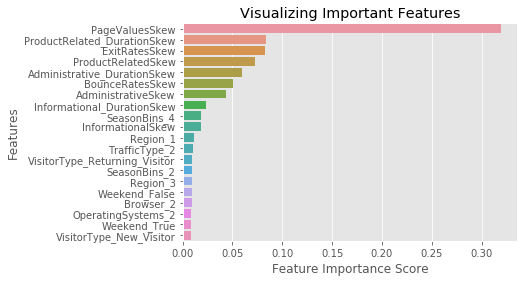

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [83]:
'PageValuesSkew','ProductRelated_DurationSkew','ExitRatesSkew','ProductRelatedSkew',
            'Administrative_DurationSkew','BounceRatesSkew','AdministrativeSkew',
            'Informational_DurationSkew','SeasonBins_4','InformationalSkew','Region_1',
            'TrafficType_2','VisitorType_Returning_Visitor','SeasonBins_2','Region_3',
            'Weekend_False','Browser_2','OperatingSystems_2','Weekend_True',
             'VisitorType_New_Visitor','TrafficType_1','Region_2','SeasonBins_1',
              'OperatingSystems_3','OperatingSystems_1','Browser_1','Region_4',
              'TrafficType_3','SeasonBins_3','Region_7','Browser_4','TrafficType_4',
              'Region_6','Region_9','TrafficType_8','TrafficType_10'

IndentationError: unexpected indent (<ipython-input-83-b5ae03877974>, line 2)

### Generating the Model on Selected Features

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Pick the top features
# Split dataset into features and labels
# Features:
fs_X= rfdata[['PageValuesSkew','ProductRelated_DurationSkew','ExitRatesSkew','ProductRelatedSkew',
            'Administrative_DurationSkew','BounceRatesSkew','AdministrativeSkew',
            'Informational_DurationSkew','SeasonBins_4','InformationalSkew','Region_1',
            'TrafficType_2','VisitorType_Returning_Visitor','SeasonBins_2','Region_3',
              'Weekend_False','Browser_2','OperatingSystems_2','Weekend_True',
             'VisitorType_New_Visitor']] 
fs_y=rfdata['RevenueEnc']    

# Split dataset into training set and test set
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(fs_X, fs_y, test_size=0.30, random_state=200) # 70% training and 30% test

After spliting, you will generate a model on the selected training set features, perform predictions on the selected test set features, and compare actual and predicted values. 

In [ ]:
print("F1_Score:",metrics.f1_score(y_test_fs, y_pred_fs))
print("AUC:",metrics.roc_auc_score(y_test_fs, y_pred_fs))
print(classification_report(y_test_fs, y_pred_fs))

## __SMOTE Feature Selection__

In [ ]:
sm = SMOTE(random_state = 123) 
X_train_smote_fs, y_train_smote_fs = sm.fit_sample(X_train_fs, y_train_fs) 

In [ ]:
clf=RandomForestClassifier(random_state=200)
# fit the model with data
clf.fit(X_train_smote_fs,y_train_smote_fs)
# predict the model
y_pred_smote_fs=clf.predict(X_test_fs)

In [84]:
cnf_matrix = metrics.confusion_matrix(y_test_fs, y_pred_smote_fs)
cnf_matrix

array([[2864,  262],
       [ 157,  416]])

In [85]:
print("F1_Score:",metrics.f1_score(y_test_fs, y_pred_smote_fs))
print("AUC:",metrics.roc_auc_score(y_test_fs, y_pred_smote_fs))
print(classification_report(y_test_fs, y_pred_smote_fs))

F1_Score: 0.6650679456434851
AUC: 0.8210951553094633
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3126
           1       0.61      0.73      0.67       573

    accuracy                           0.89      3699
   macro avg       0.78      0.82      0.80      3699
weighted avg       0.90      0.89      0.89      3699

